<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/2_Advanced/12_Exercise_Trending_Skills.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Exercise - Investigating Trending Skills

## Topics Covered

This exercise goes over:

* Applying Functions
* Exploding
* Pivoting
* Plotting

## Question

* How are skills trending for Data Analysts on a monthly basis.

Load data.

In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Trends for Data Analyst Jobs

1. For this we're going to only be looking at data analyst jobs. So we'll create a copy of our original DataFrame that filters only for Data Analyst roles.

In [3]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

2. Extract the month from the `job_posted_date`. 

In [4]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month


3. Explode the `job_skills` column

In [5]:
df_DA_explode= df_DA.explode('job_skills')

3. Let's pivot the data to get the count (or size) of each skill for each month.

In [6]:
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,196,16,556,60,2,21,0,1,26,32,...,17,229,6,1782,0,10,7,0,14,97
2,168,3,452,49,0,16,1,4,29,14,...,9,196,6,1236,3,3,4,0,3,39
3,180,4,440,38,0,23,7,1,17,14,...,7,200,7,1212,1,1,3,1,3,46
4,160,4,413,22,0,9,8,10,9,15,...,9,183,15,1177,9,2,1,0,6,28
5,131,8,308,27,0,21,10,3,9,21,...,12,127,3,960,3,4,0,0,8,20
6,161,14,392,29,0,12,7,3,16,14,...,7,150,14,1225,6,6,0,0,8,28
7,210,4,368,17,0,8,8,8,19,15,...,5,160,12,1080,0,3,0,0,5,39
8,192,3,410,22,0,12,9,4,14,11,...,9,190,9,1294,0,1,0,0,12,41
9,117,4,314,22,0,14,3,8,11,10,...,4,152,8,934,0,2,0,0,5,23


4. We need to sort the skills to be in order of count to make it easier to plot the top X.

In [7]:
# Create a total row
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
# Order columns by total count
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
# Drop total row
df_DA_pivot = df_DA_pivot.drop('Total')

df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,mattermost,xamarin,gtx,suse,nuxt.js,ovh,capacitor,esquisse,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11398,8221,6630,5623,4332,3631,3838,1868,1782,1247,...,0,0,0,0,1,0,1,0,0,0
2,7919,5741,4734,3943,3282,2581,2614,1286,1236,973,...,0,0,0,0,0,0,0,0,0,0
3,7907,5722,4785,4074,3175,2651,2570,1279,1212,894,...,0,1,0,1,0,0,0,0,0,0
4,7582,5487,4557,3766,3113,2392,2618,1202,1177,935,...,0,0,0,0,0,1,0,0,0,0
5,6627,4778,4068,3242,2708,2095,1940,976,960,853,...,0,0,0,0,0,0,0,0,0,1
6,7546,5707,4685,3805,3280,2442,2164,1175,1225,979,...,0,0,0,0,0,0,0,0,0,0
7,7687,5499,4824,3917,3347,2424,2120,1087,1080,1003,...,0,0,1,0,0,0,0,0,0,0
8,8829,6471,5589,4521,3849,2958,2566,1341,1294,1108,...,0,0,0,0,0,0,0,0,0,0
9,6829,4880,4242,3450,3129,2187,1854,940,934,848,...,0,0,0,0,0,0,0,0,0,0


5. (Optional) I like to have my months as names, not numbers, so let's change this

In [8]:
# code snippet from `6_Exercise_Job_Demand.ipynb`
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

df_DA_pivot



job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,mattermost,xamarin,gtx,suse,nuxt.js,ovh,capacitor,esquisse,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,11398,8221,6630,5623,4332,3631,3838,1868,1782,1247,...,0,0,0,0,1,0,1,0,0,0
Feb,7919,5741,4734,3943,3282,2581,2614,1286,1236,973,...,0,0,0,0,0,0,0,0,0,0
Mar,7907,5722,4785,4074,3175,2651,2570,1279,1212,894,...,0,1,0,1,0,0,0,0,0,0
Apr,7582,5487,4557,3766,3113,2392,2618,1202,1177,935,...,0,0,0,0,0,1,0,0,0,0
May,6627,4778,4068,3242,2708,2095,1940,976,960,853,...,0,0,0,0,0,0,0,0,0,1
Jun,7546,5707,4685,3805,3280,2442,2164,1175,1225,979,...,0,0,0,0,0,0,0,0,0,0
Jul,7687,5499,4824,3917,3347,2424,2120,1087,1080,1003,...,0,0,1,0,0,0,0,0,0,0
Aug,8829,6471,5589,4521,3849,2958,2566,1341,1294,1108,...,0,0,0,0,0,0,0,0,0,0
Sep,6829,4880,4242,3450,3129,2187,1854,940,934,848,...,0,0,0,0,0,0,0,0,0,0


6. Let's graph the top 5 skills by count

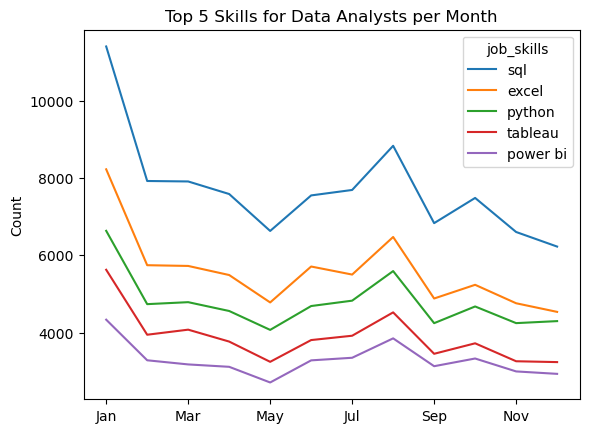

In [9]:
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()